# <center> Manipulação com Data e Hora - Python <center>
    
        No dia a dia de um Cientista de dados é muito comum em ter situações onde há necessidade de fazer manipulações   com data, seja para adição de novas variáveis ou até mesmo para fazer operações matemáticas.

        No entanto, lidar com data nem sempre é uma tarefa fácil. Com intúito de ajudar principalmente quem  está iniciando em Python preparei os exemplos a seguir. Onde será possível encontrar algumas manipulações com data, com a tentativa de ajudar em possíveis dúvidas.
   
       
       Abaixo segue o link do manual do Python de como trabalhar com data
https://docs.python.org/3/library/datetime.html#datetime.date.resolution

### 1. Bibliotecas

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install holidays 

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install workalendar

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta

## Bibliotecas importantes para análise de calendário
import holidays

from pandas.tseries.holiday import AbstractHolidayCalendar, GoodFriday, Holiday, Easter, Day
from pandas.tseries.offsets import CustomBusinessDay

### 2. Aplicação em Conjunto de Dados

   **2.1 Leitura Banco de Dados**

In [6]:
dados = pd.read_excel('../LidandoComData_Python/DadosTemporais.xlsx')

#### 2.2 Conhecendo os dados e sua estrutura

* Visualizar as Primeiras 5 linhas do conjunto de dados

In [7]:
dados.head(5)

,Hora_Inicio,Hora_Fim,Hora_Total
0,2010-01-01 12:00:00,2010-01-01 12:08:25.000,2010-01-01 12:10:25.000
1,2010-01-02 13:30:00,2010-01-02 13:33:00.000,2010-01-02 13:34:00.000
2,2010-01-03 10:17:13,2010-01-03 10:27:07.000,2010-01-03 10:28:20.000
3,2010-01-04 10:17:13,2010-01-04 10:27:06.995,2010-01-04 10:28:19.995
4,2010-01-05 11:17:13,2010-01-05 11:27:07.000,2010-01-05 11:28:20.000


* Dimensão da Base de dados

        A função shape retorna a quantidade de linhas e colunas respectivamente na base de dados.

In [8]:
dados.shape

(31, 3)

* Tipo das Variáveis

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Hora_Inicio  31 non-null     datetime64[ns]
 1   Hora_Fim     31 non-null     datetime64[ns]
 2   Hora_Total   31 non-null     datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 872.0 bytes


#### 2.3 Manipulação com Data

        A base de dados não tem nenhuma variável com somente a data, no entanto é possível extrair essa informação de uma     das variáveis com hora.
        Será extraída a data da variável Hora_Total.
       

In [10]:
dados['Data'] = dados['Hora_Total'].dt.date
dados.head(3)

,Hora_Inicio,Hora_Fim,Hora_Total,Data
0,2010-01-01 12:00:00,2010-01-01 12:08:25,2010-01-01 12:10:25,2010-01-01
1,2010-01-02 13:30:00,2010-01-02 13:33:00,2010-01-02 13:34:00,2010-01-02
2,2010-01-03 10:17:13,2010-01-03 10:27:07,2010-01-03 10:28:20,2010-01-03


        Agora que a base já tem uma variável com apenas a data é importante verificar qual o tipo da variável criada.

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Hora_Inicio  31 non-null     datetime64[ns]
 1   Hora_Fim     31 non-null     datetime64[ns]
 2   Hora_Total   31 non-null     datetime64[ns]
 3   Data         31 non-null     object        
dtypes: datetime64[ns](3), object(1)
memory usage: 1.1+ KB


        É possível reparar que a variável data está no formato objeto e não no formato data. Para isso, será alterado o tipo da variável para datetime, assim será possível fazer extrações de informações da data como dia da semana, dia, mês, ... 

* Alterar um Objeto para o formato de data

In [12]:
dados['Data'] = pd.to_datetime(dados['Data'])     

* Alterar um Objeto para o formato de data especificando o formato 

In [13]:
dados['Data'] = pd.to_datetime(dados['Data'], format="%Y-%m-%d") ## É preciso especificar de forma adequada o formato da data

In [14]:
dados.head(2)

,Hora_Inicio,Hora_Fim,Hora_Total,Data
0,2010-01-01 12:00:00,2010-01-01 12:08:25,2010-01-01 12:10:25,2010-01-01
1,2010-01-02 13:30:00,2010-01-02 13:33:00,2010-01-02 13:34:00,2010-01-02


Adição de variáveis com data

* Dia
* Mês
* Ano

In [15]:
dados['Dia'] = dados['Data'].dt.day       ## Extrair Dia

dados['Ano'] = dados['Data'].dt.year      ## Extrair Ano

dados.head(3)

,Hora_Inicio,Hora_Fim,Hora_Total,Data,Dia,Ano
0,2010-01-01 12:00:00,2010-01-01 12:08:25,2010-01-01 12:10:25,2010-01-01,1,2010
1,2010-01-02 13:30:00,2010-01-02 13:33:00,2010-01-02 13:34:00,2010-01-02,2,2010
2,2010-01-03 10:17:13,2010-01-03 10:27:07,2010-01-03 10:28:20,2010-01-03,3,2010


In [16]:
dados['Mês'] = dados['Data'].dt.month     ## Extrair Mês
dados['Data'].dt.strftime('%d')    ## Dia do mês como um número decimal acolchoados zero.

0     01
1     02
2     03
3     04
4     05
5     06
6     07
7     08
8     09
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
Name: Data, dtype: object

* Extrair o dia da semana

In [17]:
dados['Dia Semana'] = dados['Data'].dt.day_name()      ## Extração do dia da Semana


## Outras formas de fazer a extração
dados['Data'].dt.strftime('%A')    ## Extração do dia da Semana, Dia da semana como o nome completo do local.

0        Friday
1      Saturday
2        Sunday
3        Monday
4       Tuesday
5     Wednesday
6      Thursday
7        Friday
8      Saturday
9        Sunday
10       Monday
11      Tuesday
12    Wednesday
13     Thursday
14       Friday
15     Saturday
16       Sunday
17       Monday
18      Tuesday
19    Wednesday
20     Thursday
21       Friday
22     Saturday
23       Sunday
24       Monday
25      Tuesday
26    Wednesday
27     Thursday
28       Friday
29     Saturday
30       Sunday
Name: Data, dtype: object

In [18]:
dados['Data'].dt.strftime('%w') # Extração do dia da semana. Dia da semana como número decimal, onde 0 é domingo e 6 é sábado.

0     5
1     6
2     0
3     1
4     2
5     3
6     4
7     5
8     6
9     0
10    1
11    2
12    3
13    4
14    5
15    6
16    0
17    1
18    2
19    3
20    4
21    5
22    6
23    0
24    1
25    2
26    3
27    4
28    5
29    6
30    0
Name: Data, dtype: object

        O datetime fornece o dia da semana em inglês, para deixar em português utilizo a função replace, responsável por    fazer as substituições desejadas.
        Antes de começar a fazer as substituições é necessário checar como estão escritos os dias da semana, pois a função replace procura exatamente o nome que estiver escrito dentro da função. 

* Visualizar os dias da semana contidos na base de dados

In [19]:
dados['Dia Semana'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [20]:
dados['Dia Semana'] = dados['Dia Semana'].replace(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
                      'Tuesday'], ['Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo', 'Segunda', 'Terça'])

dados.head(3)

,Hora_Inicio,Hora_Fim,Hora_Total,Data,Dia,Ano,Mês,Dia Semana
0,2010-01-01 12:00:00,2010-01-01 12:08:25,2010-01-01 12:10:25,2010-01-01,1,2010,1,Sexta
1,2010-01-02 13:30:00,2010-01-02 13:33:00,2010-01-02 13:34:00,2010-01-02,2,2010,1,Sábado
2,2010-01-03 10:17:13,2010-01-03 10:27:07,2010-01-03 10:28:20,2010-01-03,3,2010,1,Domingo


* Extrair apenas o Mês-Ano

In [21]:
dados['Mês-Ano'] = dados['Data'].dt.strftime('%Y-%m')

dados.head(1)

,Hora_Inicio,Hora_Fim,Hora_Total,Data,Dia,Ano,Mês,Dia Semana,Mês-Ano
0,2010-01-01 12:00:00,2010-01-01 12:08:25,2010-01-01 12:10:25,2010-01-01,1,2010,1,Sexta,2010-01


* Extrair apenas o Dia e o mês

In [22]:
dados['Dia-Mês'] = dados['Data'].dt.strftime('%d-%m')

dados.head(1)

,Hora_Inicio,Hora_Fim,Hora_Total,Data,Dia,Ano,Mês,Dia Semana,Mês-Ano,Dia-Mês
0,2010-01-01 12:00:00,2010-01-01 12:08:25,2010-01-01 12:10:25,2010-01-01,1,2010,1,Sexta,2010-01,01-01


* Aumentando em um dia a data

In [23]:
dados['Data'] = dados['Data'] + timedelta(days = 1)
dados.head(1)

,Hora_Inicio,Hora_Fim,Hora_Total,Data,Dia,Ano,Mês,Dia Semana,Mês-Ano,Dia-Mês
0,2010-01-01 12:00:00,2010-01-01 12:08:25,2010-01-01 12:10:25,2010-01-02,1,2010,1,Sexta,2010-01,01-01


* Diminuindo em um dia a Data

In [24]:
dados['Data'] = dados['Data'] - timedelta(days = 1)
dados.head(1)

,Hora_Inicio,Hora_Fim,Hora_Total,Data,Dia,Ano,Mês,Dia Semana,Mês-Ano,Dia-Mês
0,2010-01-01 12:00:00,2010-01-01 12:08:25,2010-01-01 12:10:25,2010-01-01,1,2010,1,Sexta,2010-01,01-01


In [25]:
dados['Data'].dt.strftime('%A')

0        Friday
1      Saturday
2        Sunday
3        Monday
4       Tuesday
5     Wednesday
6      Thursday
7        Friday
8      Saturday
9        Sunday
10       Monday
11      Tuesday
12    Wednesday
13     Thursday
14       Friday
15     Saturday
16       Sunday
17       Monday
18      Tuesday
19    Wednesday
20     Thursday
21       Friday
22     Saturday
23       Sunday
24       Monday
25      Tuesday
26    Wednesday
27     Thursday
28       Friday
29     Saturday
30       Sunday
Name: Data, dtype: object

#### 2.4 Manipulação com calendário

        No dia a dia do cientista/analista de dados é muito comum a necessidade de saber os dias uteis, feriados, dentre       outras informações.
        Abaixo vou mostrar como identificar na base de dados os dias que são feriados, são considerados como não úteis e    úteis, as semanas do mês.
        A base de dados utilizada como exemplo contém apenas dados de Janeiro de 2010, a critério de consulta para checar     as saídas dos códigos abaixo segue o calendário do período em estudo.

#### Calendário Janeiro 2010

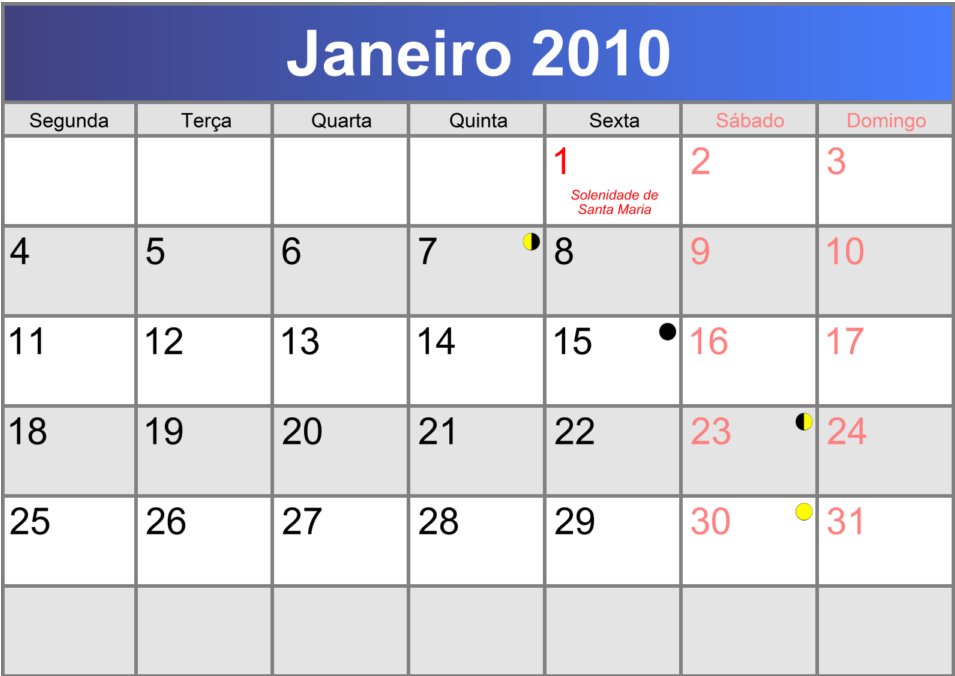

In [26]:
from IPython.display import Image, SVG
i = Image(filename = '../LidandoComData_Python/janeiro-2010.png')
i

* #### Reconhecendo os dias da base de dados que são feriados nacionais.

        No código abaixo estão presentes todos os feriados nacionais.

In [27]:
class Feriados_Brasil(AbstractHolidayCalendar):
    rules = [
        Holiday('Confraternização Universal', month=1, day=1),
        # Terça feira de carnaval (47 dias antes da Páscoa)
        Holiday('Segunda Feira de Carnaval', month=1, day=1, offset=[Easter(), Day(-48)]),
        Holiday('Terça Feira de Carnaval', month=1, day=1, offset=[Easter(), Day(-47)]),
        # Sexta feira Santa(GoodFriday)
        GoodFriday,       
        Holiday('Tiradentes', month = 4, day = 21),
        Holiday('Dia do Trabalho', month = 5, day = 1),
        # Corpus Christi (60 dias após a Páscoa, ou 62 dias após a Sexta Feira Santa)
        Holiday('Corpus Christi', month=1, day=1, offset=[Easter(), Day(60)]),        
        Holiday('Independência do Brasil', month = 9, day = 7),
        Holiday('Nossa Senhora Aparecida - Padroeira do Brasil', month = 10, day = 12),
        Holiday('Finados', month = 11, day = 2),
        Holiday('Proclamação da República', month = 11, day = 15),
        Holiday('Natal', month = 12, day = 25)]
    
br_feriados = CustomBusinessDay(calendar=Feriados_Brasil())    
inst = Feriados_Brasil()

feriados = inst.holidays(dt.datetime(2010, 1, 1), dt.datetime(2010, 12, 31))
feriados = np.array(feriados)
feriados = pd.DataFrame(feriados, columns=['Data'])


     Como a base de dados é composta apenas por dados de janeiro 2010 o único feriado será do dia 01.

In [28]:
dados = dados.merge(feriados, on='Data', how='left', indicator=True)
dados= dados.assign(Feriados = lambda dataframe: dataframe['_merge'].map(lambda _merge: 1 if _merge == "both" else 0)).drop(['_merge'], axis=1)
dados.head(3)

,Hora_Inicio,Hora_Fim,Hora_Total,Data,Dia,Ano,Mês,Dia Semana,Mês-Ano,Dia-Mês,Feriados
0,2010-01-01 12:00:00,2010-01-01 12:08:25,2010-01-01 12:10:25,2010-01-01,1,2010,1,Sexta,2010-01,01-01,1
1,2010-01-02 13:30:00,2010-01-02 13:33:00,2010-01-02 13:34:00,2010-01-02,2,2010,1,Sábado,2010-01,02-01,0
2,2010-01-03 10:17:13,2010-01-03 10:27:07,2010-01-03 10:28:20,2010-01-03,3,2010,1,Domingo,2010-01,03-01,0


* #### Identificação dos dias que não são úteis

      São considerados dias não úteis os Feriados e os Domingos.
      Com intúito de identificar os dias que não são úteis na base de dados foi criada a variável Dias_NãoUteis, onde:
        
          0 = dias uteis 
          1 = dias não úteis (domingos e feriados)

In [29]:
dados['Dias_NãoUteis'] = np.where((dados["Dia Semana"] == 'Domingo') | (dados["Feriados"] == 1), 1, 0)
dados

,Hora_Inicio,Hora_Fim,Hora_Total,Data,Dia,Ano,Mês,Dia Semana,Mês-Ano,Dia-Mês,Feriados,Dias_NãoUteis
0,2010-01-01 12:00:00,2010-01-01 12:08:25.000,2010-01-01 12:10:25.000,2010-01-01,1,2010,1,Sexta,2010-01,01-01,1,1
1,2010-01-02 13:30:00,2010-01-02 13:33:00.000,2010-01-02 13:34:00.000,2010-01-02,2,2010,1,Sábado,2010-01,02-01,0,0
2,2010-01-03 10:17:13,2010-01-03 10:27:07.000,2010-01-03 10:28:20.000,2010-01-03,3,2010,1,Domingo,2010-01,03-01,0,1
3,2010-01-04 10:17:13,2010-01-04 10:27:06.995,2010-01-04 10:28:19.995,2010-01-04,4,2010,1,Segunda,2010-01,04-01,0,0
4,2010-01-05 11:17:13,2010-01-05 11:27:07.000,2010-01-05 11:28:20.000,2010-01-05,5,2010,1,Terça,2010-01,05-01,0,0
5,2010-01-06 07:00:00,2010-01-06 07:13:00.000,2010-01-06 07:13:30.000,2010-01-06,6,2010,1,Quarta,2010-01,06-01,0,0
6,2010-01-07 10:17:13,2010-01-07 10:27:06.995,2010-01-07 10:28:19.995,2010-01-07,7,2010,1,Quinta,2010-01,07-01,0,0
7,2010-01-08 08:10:13,2010-01-08 08:12:07.000,2010-01-08 10:13:00.000,2010-01-08,8,2010,1,Sexta,2010-01,08-01,0,0
8,2010-01-09 10:17:13,2010-01-09 10:27:06.995,2010-01-09 10:28:19.995,2010-01-09,9,2010,1,Sábado,2010-01,09-01,0,0
9,2010-01-10 10:17:13,2010-01-10 10:27:06.995,2010-01-10 10:28:19.995,2010-01-10,10,2010,1,Domingo,2010-01,10-01,0,1


#### Numeração dos dias úteis

In [30]:
dados.sort_values('Data', inplace=True) 

last_date_month = 0 #Váriavel que salva o último dia útil para checar se começou um mês novo
working_days = 0 #Contador de qual dia útil do mês nós estamos
last_day = 0
nth_working_day = [] #Onde vamos salvar a lista de dias úteis para depois criar a série de dias útei que queremos

for index, row in dados.iterrows(): ## Faz a iteração em linhas de DataFrame como pares (índice, série).
    

    if row['Dias_NãoUteis'] == 1:
        #Esse código vai ser executado nos fds e feriados.
        nth_working_day.append(0)
    else:
        #Esse código vai ser executado quando for dia útil
        
        #Checa se é um mês novo e reseta o contador se for.
        if row['Mês'] != last_date_month:
            last_date_month = row['Mês']
            working_days = 0
            
        if row['Data'] != last_day:
            
        #Soma 1 ao contador de dias uteis e adiciona a nossa lista
            working_days += 1
        nth_working_day.append(working_days)
        last_day = row['Data']

dados['Dias_Úteis'] = nth_working_day
dados.head(5)

,Hora_Inicio,Hora_Fim,Hora_Total,Data,Dia,Ano,Mês,Dia Semana,Mês-Ano,Dia-Mês,Feriados,Dias_NãoUteis,Dias_Úteis
0,2010-01-01 12:00:00,2010-01-01 12:08:25.000,2010-01-01 12:10:25.000,2010-01-01,1,2010,1,Sexta,2010-01,01-01,1,1,0
1,2010-01-02 13:30:00,2010-01-02 13:33:00.000,2010-01-02 13:34:00.000,2010-01-02,2,2010,1,Sábado,2010-01,02-01,0,0,1
2,2010-01-03 10:17:13,2010-01-03 10:27:07.000,2010-01-03 10:28:20.000,2010-01-03,3,2010,1,Domingo,2010-01,03-01,0,1,0
3,2010-01-04 10:17:13,2010-01-04 10:27:06.995,2010-01-04 10:28:19.995,2010-01-04,4,2010,1,Segunda,2010-01,04-01,0,0,2
4,2010-01-05 11:17:13,2010-01-05 11:27:07.000,2010-01-05 11:28:20.000,2010-01-05,5,2010,1,Terça,2010-01,05-01,0,0,3


* #### Pagamento no Quinto Dia Util

        Uma das datas de pagamento é o quinto dia útil do mês, no entanto quando o quinto dia útil cai no sábado o        pagamento é realizado no dia anterior. Com intúito de identificar o dia do pagamento, foi criada a variável            Pagamento, onde:

             1 = dia do pagamento referente do quinto dia útil
             0 = Sem pagamento

In [32]:
conditions = [
    (dados['Dias_Úteis'] == 5) & (dados['Dia Semana'] != 7.0),
    (dados['Dias_Úteis'] == 4) & (dados['Dia Semana'] == 6.0)]
choices = [1, 1]
dados['Pagamento'] = np.select(conditions, choices, default= 0)
dados

,Hora_Inicio,Hora_Fim,Hora_Total,Data,Dia,Ano,Mês,Dia Semana,Mês-Ano,Dia-Mês,Feriados,Dias_NãoUteis,Dias_Úteis,Pagamento
0,2010-01-01 12:00:00,2010-01-01 12:08:25.000,2010-01-01 12:10:25.000,2010-01-01,1,2010,1,Sexta,2010-01,01-01,1,1,0,0
1,2010-01-02 13:30:00,2010-01-02 13:33:00.000,2010-01-02 13:34:00.000,2010-01-02,2,2010,1,Sábado,2010-01,02-01,0,0,1,0
2,2010-01-03 10:17:13,2010-01-03 10:27:07.000,2010-01-03 10:28:20.000,2010-01-03,3,2010,1,Domingo,2010-01,03-01,0,1,0,0
3,2010-01-04 10:17:13,2010-01-04 10:27:06.995,2010-01-04 10:28:19.995,2010-01-04,4,2010,1,Segunda,2010-01,04-01,0,0,2,0
4,2010-01-05 11:17:13,2010-01-05 11:27:07.000,2010-01-05 11:28:20.000,2010-01-05,5,2010,1,Terça,2010-01,05-01,0,0,3,0
5,2010-01-06 07:00:00,2010-01-06 07:13:00.000,2010-01-06 07:13:30.000,2010-01-06,6,2010,1,Quarta,2010-01,06-01,0,0,4,0
6,2010-01-07 10:17:13,2010-01-07 10:27:06.995,2010-01-07 10:28:19.995,2010-01-07,7,2010,1,Quinta,2010-01,07-01,0,0,5,1
7,2010-01-08 08:10:13,2010-01-08 08:12:07.000,2010-01-08 10:13:00.000,2010-01-08,8,2010,1,Sexta,2010-01,08-01,0,0,6,0
8,2010-01-09 10:17:13,2010-01-09 10:27:06.995,2010-01-09 10:28:19.995,2010-01-09,9,2010,1,Sábado,2010-01,09-01,0,0,7,0
9,2010-01-10 10:17:13,2010-01-10 10:27:06.995,2010-01-10 10:28:19.995,2010-01-10,10,2010,1,Domingo,2010-01,10-01,0,1,0,0


* #### Numeração Semana do Mês

1° Forma:  

        Numeração da semana do mês levando em consideração que o mês tem início no domingo e fim no sábado, portanto caso a semana comece na quarta a primeira semana terá apenas 4 dias. Nesse caso é possível ter até a 6° semana, caso a semana     comece na sexta e termine em um domingo, teremos: primeira semana com 2 dias e a ultima com apenas 1 dia, um exemplo.

In [33]:
import datetime
from datetime import date
from math import ceil

def week_of_month(dt):
    """ Returns the week of the month for the specified date.
    """

    first_day = dt.replace(day=1)

    dom = dt.day
    adjusted_dom = dom + (first_day.weekday() + 1) % 7

    return int(ceil(adjusted_dom/7.0))

dados['semana_do_mês'] = [week_of_month(e) for e in dados.Data]
dados

,Hora_Inicio,Hora_Fim,Hora_Total,Data,Dia,Ano,Mês,Dia Semana,Mês-Ano,Dia-Mês,Feriados,Dias_NãoUteis,Dias_Úteis,Pagamento,semana_do_mês
0,2010-01-01 12:00:00,2010-01-01 12:08:25.000,2010-01-01 12:10:25.000,2010-01-01,1,2010,1,Sexta,2010-01,01-01,1,1,0,0,1
1,2010-01-02 13:30:00,2010-01-02 13:33:00.000,2010-01-02 13:34:00.000,2010-01-02,2,2010,1,Sábado,2010-01,02-01,0,0,1,0,1
2,2010-01-03 10:17:13,2010-01-03 10:27:07.000,2010-01-03 10:28:20.000,2010-01-03,3,2010,1,Domingo,2010-01,03-01,0,1,0,0,2
3,2010-01-04 10:17:13,2010-01-04 10:27:06.995,2010-01-04 10:28:19.995,2010-01-04,4,2010,1,Segunda,2010-01,04-01,0,0,2,0,2
4,2010-01-05 11:17:13,2010-01-05 11:27:07.000,2010-01-05 11:28:20.000,2010-01-05,5,2010,1,Terça,2010-01,05-01,0,0,3,0,2
5,2010-01-06 07:00:00,2010-01-06 07:13:00.000,2010-01-06 07:13:30.000,2010-01-06,6,2010,1,Quarta,2010-01,06-01,0,0,4,0,2
6,2010-01-07 10:17:13,2010-01-07 10:27:06.995,2010-01-07 10:28:19.995,2010-01-07,7,2010,1,Quinta,2010-01,07-01,0,0,5,1,2
7,2010-01-08 08:10:13,2010-01-08 08:12:07.000,2010-01-08 10:13:00.000,2010-01-08,8,2010,1,Sexta,2010-01,08-01,0,0,6,0,2
8,2010-01-09 10:17:13,2010-01-09 10:27:06.995,2010-01-09 10:28:19.995,2010-01-09,9,2010,1,Sábado,2010-01,09-01,0,0,7,0,2
9,2010-01-10 10:17:13,2010-01-10 10:27:06.995,2010-01-10 10:28:19.995,2010-01-10,10,2010,1,Domingo,2010-01,10-01,0,1,0,0,3


2º Forma

        Contagem dos dias da semana sempre de 7 em 7, independente do dia da semana que começa o mês.

In [34]:
conditions = [
    (dados['Dia'] /7 <= 1),
    ((dados['Dia'] /7 > 1) & (dados['Dia'] /7 <= 2)),
    ((dados['Dia'] /7 > 2) & (dados['Dia'] /7 <= 3)),
    ((dados['Dia'] /7 > 3) & (dados['Dia'] /7 <= 4)),
    (dados['Dia'] /7 > 4)]
choices = [1, 2, 3, 4, 5]

dados['Semana_Mês'] = np.select(conditions, choices, default= 0)
dados

,Hora_Inicio,Hora_Fim,Hora_Total,Data,Dia,Ano,Mês,Dia Semana,Mês-Ano,Dia-Mês,Feriados,Dias_NãoUteis,Dias_Úteis,Pagamento,semana_do_mês,Semana_Mês
0,2010-01-01 12:00:00,2010-01-01 12:08:25.000,2010-01-01 12:10:25.000,2010-01-01,1,2010,1,Sexta,2010-01,01-01,1,1,0,0,1,1
1,2010-01-02 13:30:00,2010-01-02 13:33:00.000,2010-01-02 13:34:00.000,2010-01-02,2,2010,1,Sábado,2010-01,02-01,0,0,1,0,1,1
2,2010-01-03 10:17:13,2010-01-03 10:27:07.000,2010-01-03 10:28:20.000,2010-01-03,3,2010,1,Domingo,2010-01,03-01,0,1,0,0,2,1
3,2010-01-04 10:17:13,2010-01-04 10:27:06.995,2010-01-04 10:28:19.995,2010-01-04,4,2010,1,Segunda,2010-01,04-01,0,0,2,0,2,1
4,2010-01-05 11:17:13,2010-01-05 11:27:07.000,2010-01-05 11:28:20.000,2010-01-05,5,2010,1,Terça,2010-01,05-01,0,0,3,0,2,1
5,2010-01-06 07:00:00,2010-01-06 07:13:00.000,2010-01-06 07:13:30.000,2010-01-06,6,2010,1,Quarta,2010-01,06-01,0,0,4,0,2,1
6,2010-01-07 10:17:13,2010-01-07 10:27:06.995,2010-01-07 10:28:19.995,2010-01-07,7,2010,1,Quinta,2010-01,07-01,0,0,5,1,2,1
7,2010-01-08 08:10:13,2010-01-08 08:12:07.000,2010-01-08 10:13:00.000,2010-01-08,8,2010,1,Sexta,2010-01,08-01,0,0,6,0,2,2
8,2010-01-09 10:17:13,2010-01-09 10:27:06.995,2010-01-09 10:28:19.995,2010-01-09,9,2010,1,Sábado,2010-01,09-01,0,0,7,0,2,2
9,2010-01-10 10:17:13,2010-01-10 10:27:06.995,2010-01-10 10:28:19.995,2010-01-10,10,2010,1,Domingo,2010-01,10-01,0,1,0,0,3,2
